## IMPORTACIÓN DE LIBRERÍAS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CARGA DEL DATASET

In [4]:
df = pd.read_csv('dataset_finanzas_personales_madrid_34_años.csv', delimiter = ',')

## DEFINICIÓN DEL CAMPO 'ID' COMO ÍNDICE

In [5]:
df.set_index('ID',inplace=True)

## PRIMERA EXPLORACIÓN

In [6]:
df.head()

,AÑO,MES,DIA,FECHA,TIPO,PRECIO
ID,,,,,,
1,2024,1,1,1/1/2024,Vivienda,"1,100.00 €"
2,2024,1,1,1/1/2024,Ingreso,1.16 €
3,2024,1,1,1/1/2024,Estudio,48.00 €
4,2024,1,2,1/2/2024,Regalo,16.99 €
5,2024,1,2,1/2/2024,Deporte,58.54 €


In [7]:
df.tail()

,AÑO,MES,DIA,FECHA,TIPO,PRECIO
ID,,,,,,
310,2024,8,20,8/20/2024,Belleza,10.40 €
311,2024,8,20,8/20/2024,Supermercado,5.99 €
312,2024,8,21,8/21/2024,Ingreso,2.00 €
313,2024,8,24,8/24/2024,Servicios,1.39 €
314,2024,8,27,8/27/2024,Supermercado,49.97 €


#### CANTIDAD DE NULOS

In [8]:
df.isnull().sum()

AÑO       0
MES       0
DIA       0
FECHA     0
TIPO      0
PRECIO    0
dtype: int64

#### INFORMACIÓN DE LOS CAMPOS

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 1 to 314
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AÑO     314 non-null    int64 
 1   MES     314 non-null    int64 
 2   DIA     314 non-null    int64 
 3   FECHA   314 non-null    object
 4   TIPO    314 non-null    object
 5   PRECIO  314 non-null    object
dtypes: int64(3), object(3)
memory usage: 17.2+ KB


## TRANSFORMACION DE CAMPOS

### CAMPO FECHA

In [10]:
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%m/%d/%Y')

### CAMPO PRECIO

In [11]:
df['PRECIO'] = df['PRECIO'].str.replace(' €','') # Ejemplo: 1,424.18 € => 1,424.18
df['PRECIO'] = df['PRECIO'].str.replace(',','') #Separador de miles | Ejemplo: 1,424.18 => 1424.18
df['PRECIO'] = df['PRECIO'].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314 entries, 1 to 314
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   AÑO     314 non-null    int64         
 1   MES     314 non-null    int64         
 2   DIA     314 non-null    int64         
 3   FECHA   314 non-null    datetime64[ns]
 4   TIPO    314 non-null    object        
 5   PRECIO  314 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 17.2+ KB


## ANÁLISIS DESCRIPTIVO

### CONTEO DE VALORES

In [13]:
#Conteo de frecuencias
df['TIPO'].value_counts()

TIPO
Supermercado    68
Vivienda        41
Gastronomía     38
Ingreso         34
Servicios       25
Deporte         17
Viajes          14
Transporte      12
Estudio         10
Regalo          10
Salud           10
Belleza          9
Herramientas     9
Ropa             6
Actividades      6
Café             4
Teatro           1
Name: count, dtype: int64

In [14]:
#En porcentaje
df['TIPO'].value_counts(normalize=True)*100

TIPO
Supermercado    21.656051
Vivienda        13.057325
Gastronomía     12.101911
Ingreso         10.828025
Servicios        7.961783
Deporte          5.414013
Viajes           4.458599
Transporte       3.821656
Estudio          3.184713
Regalo           3.184713
Salud            3.184713
Belleza          2.866242
Herramientas     2.866242
Ropa             1.910828
Actividades      1.910828
Café             1.273885
Teatro           0.318471
Name: proportion, dtype: float64

### SUMA DE PRECIOS POR TIPO

In [15]:
#Sumar los 'PRECIOS' por 'TIPO' y orderdarlos de mayor a menor
df.groupby('TIPO')['PRECIO'].sum().sort_values(ascending=False)

TIPO
Ingreso         14906.03
Vivienda         9139.72
Supermercado     1458.78
Deporte           733.69
Herramientas      692.43
Gastronomía       418.44
Viajes            398.40
Ropa              281.09
Salud             244.43
Estudio           228.00
Servicios         118.87
Belleza           113.09
Regalo             82.92
Transporte         58.15
Café               34.65
Actividades        32.31
Teatro             15.00
Name: PRECIO, dtype: float64

In [16]:
#En porcentaje
df_gastos = df[df['TIPO']!='Ingreso']
df_gastos.groupby('TIPO')['PRECIO'].sum().sort_values(ascending=False)/df_gastos['PRECIO'].sum()*100

TIPO
Vivienda        65.051527
Supermercado    10.382798
Deporte          5.222004
Herramientas     4.928338
Gastronomía      2.978227
Viajes           2.835593
Ropa             2.000645
Salud            1.739719
Estudio          1.622779
Servicios        0.846052
Belleza          0.804913
Regalo           0.590179
Transporte       0.413880
Café             0.246620
Actividades      0.229965
Teatro           0.106762
Name: PRECIO, dtype: float64

### MODA

In [17]:
df['TIPO'].mode()

0    Supermercado
Name: TIPO, dtype: object

### MEDIA

In [18]:
round(df['PRECIO'].mean(),2)

92.22

### MEDIANA

In [19]:
df["PRECIO"].median()

10.0

### MÁXIMO

In [20]:
df["PRECIO"].max()

2057.19

### MÍNIMO

In [21]:
df["PRECIO"].min()

0.05

### ÍNDICE DEL VALOR MÁXIMO

In [22]:
df['PRECIO'].idxmax()

140

In [23]:
df.loc[140]

AÑO                      2024
MES                         4
DIA                        10
FECHA     2024-04-10 00:00:00
TIPO                  Ingreso
PRECIO                2057.19
Name: 140, dtype: object

### ÍNDICE DEL VALOR MÍNIMO

In [24]:
df['PRECIO'].idxmin()

104

In [25]:
df.loc[104]

AÑO                      2024
MES                         3
DIA                        25
FECHA     2024-03-25 00:00:00
TIPO                  Ingreso
PRECIO                   0.05
Name: 104, dtype: object

### PRIMERA FECHA

In [26]:
df['FECHA'].min()

Timestamp('2024-01-01 00:00:00')

### ÚLTIMA FECHA

In [27]:
df['FECHA'].max()

Timestamp('2024-08-27 00:00:00')

## RELACIÓN INGRESO / EGRESO

### INGRESOS

In [28]:
#Sumar los 'PRECIOS' cuando 'TIPO' = 'Ingreso'
ingresos = df[df['TIPO']=='Ingreso']['PRECIO'].sum()
ingresos

14906.03

### EGRESOS

In [29]:
#Sumar los 'PRECIOS' cuando 'TIPO' sea distinto a 'Ingreso'
egresos = round(df[df['TIPO']!='Ingreso']['PRECIO'].sum(),2)
egresos

14049.97

### DIFERENCIA INGRESOS vs EGRESOS

In [30]:
dif = ingresos - egresos
round(dif,2)

856.06

In [31]:
data = pd.DataFrame({
    'Tipo': ['Ingresos', 'Egresos'],
    'Monto': [ingresos, egresos]
})

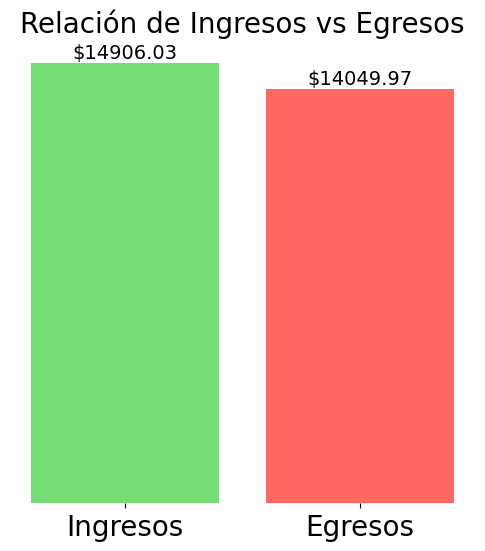

In [50]:
plt.figure(figsize=(6, 6))

pastel_colors = ['#77dd77', '#ff6961']
plt.bar(data['Tipo'], data['Monto'], color=pastel_colors)

plt.title('Relación de Ingresos vs Egresos', fontsize=20)
plt.xticks(fontsize=20)

plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0)

plt.grid(False)

for i, v in enumerate(data['Monto']):
    plt.text(i, v + 0.01 * max(data['Monto']), f"${v:.2f}", ha='center', fontsize = 14)

plt.show()

#### CONCLUSIÓN

En este gráfico de barras podemos observar como la persona pudo generar desde el 2024-01-01 al 2024-08-27 **mayores ingresos que egresos**, con una diferencia de **856.06 €**

## DISCRIMINACIÓN DE EGRESOS

In [38]:
#Sumar los 'PRECIOS' por 'TIPO' excepto 'Ingreso'. Orderdarlos de mayor a menor
egresos_discriminados = df[df['TIPO'] != 'Ingreso'].groupby('TIPO')['PRECIO'].sum().sort_values(ascending=False)
egresos_discriminados

TIPO
Vivienda        9139.72
Supermercado    1458.78
Deporte          733.69
Herramientas     692.43
Gastronomía      418.44
Viajes           398.40
Ropa             281.09
Salud            244.43
Estudio          228.00
Servicios        118.87
Belleza          113.09
Regalo            82.92
Transporte        58.15
Café              34.65
Actividades       32.31
Teatro            15.00
Name: PRECIO, dtype: float64

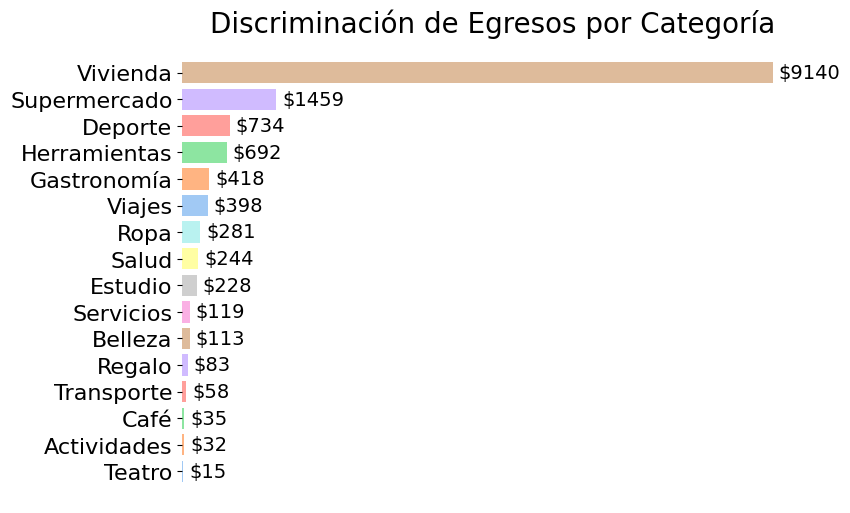

In [45]:
plt.figure(figsize=(8, 6))

egresos_discriminados = egresos_discriminados.sort_values(ascending=True)

pastel_colors = sns.color_palette("pastel", len(egresos_discriminados))
plt.barh(egresos_discriminados.index, egresos_discriminados.values, color=pastel_colors)

plt.title('Discriminación de Egresos por Categoría', fontsize=20)
plt.xticks(fontsize=20)

plt.yticks(fontsize=16)
plt.xticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0)
plt.grid(False)

for i, v in enumerate(egresos_discriminados):
    plt.text(v + 0.01 * max(egresos_discriminados), i, f"${v:.0f}", va='center', fontsize=14)

plt.show()

#### CONCLUSIÓN

Se observa como 'Vivienda' acapara el **65.05%** de los egresos de la persona siendo este el gasto más determinante en el transcursos de los meses

Este documento fue creado por [Fede Labate](https://www.linkedin.com/in/fhlabate/) con un dataset ficticio intentando simular las finanzas personales de una persona de 34 años residente de Madrid. 

Espero que os inspire en su proceso de formación y cualquier duda o curiosidad, pueden escribirme por Linkedin 🙌